## Sistemas de Recomendación

**Motivación**

Una de las aplicaciones más usadas recientemente es “People who bought this also bought this…”, se intenta predecir la respuesta del usuario entre varias opciones.

Caso similar para recomendación de personas en redes sociales "podrías conocer a..."

#### Modelado de Sistemas de recomendación

**Utility Matrix**

En los sistemas de recomendación tenemos 2 clases de datos, usuarios y artículos. Esta información puede ser representada en una matriz donde las filas son los usuarios y las columnas son los artículos. 

Los valores de la matriz es el grado de preferencia de un usuario por un artículo. Los valores de los datos para este tipo de sistemas son de 2 tipos: 

- ratings explícitos dados por los usuarios. Ejemplo, calificaciones de 1-5 estrellas

- ratings implícitos los cuales se pueden inferir por la actividad del usuario, por ejemplo si vio la pelícila completa, número de veces que reproduce una canción.

Un ejemplo es la siguinte matriz

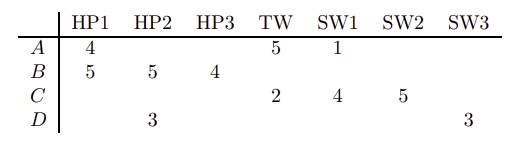

Notar que en ejemplos reales, la mayoría de las películas (artículos) tendrá blancos (missings), la matriz será incluso más dispera (sparse)

Lo que intentamos hacer es predecir los valores faltantes. Como intentamos resolver un problema de recomendación, no es necesario encontrar un valor para cada missing, nos podemos enfocar en encontrar que entradas de la matriz es más probable que haya un valor alto (nos interesa lo que le podría gustar a un usuario, no lo que no le gusta).


Podemos pensar este problema como uno de **imputación de datos faltantes**. No obstante, las dificultades a este enfoque son:


- datos ralos: cada usuario califica un número 'pequeño' de películas. Hay películas con pocas vistas.
- escalabilidad: el número de películas y usuarios es generalmente grande, por ejemplo el catálogo de Disney +
- cold start: Items nuevos no tienen ratings, suarios nuevos no tienen historia.

Por estas razones, tipicamente no es posible usar técnicas estadísticas de imputación de datos.


**Enfoques de recomendación**

- **Basado en Contenido**: En función de las carácterísticas de los productos. Por ejemplo para una película las ropiedades pueden ser genero, director, actores, etc. En este ejemplo de películas se busca encontrar películas similares, porque el objeyivo es 'predecir' películas no vistas por un usuario que le podrían interesar o gustar.


-  **Filtrado colaborativo**: Se utilizan gustos de usuarios o artículos similares (este enfoque es bastante popular).


- **Factores Latentes**: Se utiliza reducción de dimensionalidad, esta idea propone que hay factores que describen a las películas y los gustos de los usuarios.

### Recomendación Basada en Contenido

**Perfiles de productos**

Para Sistemas de de recomendación basados en contenido debemos construir un perfil para cada artículo representando características importantes de dicho artículo. En algunos casos esto más sencillo que en otros.

**Medidas de similitud**

Para poder cuantificar que tan parecidos son 2 artículos debemos definir medidas de similitud.

- distancia coseno. Geometricamente mide el angulo entre 2 vectores 
$$cos(x,y) = \frac{x \cdot y}{||x|| \cdot ||y||}$$

Tecnicamente estamos midiendo el angulo formado entre 0 y 180, entonces obtendremos un valor entre 1 y -1 donde mientras más cercano a 1 significa mayor similaridad

- diastancia Jaccard. La similitud de Jaccard de 2 conjuntos es la intersección de los conjuntos dividida por la unión de los conjuntos. Es un medida popular que cuantifica que tan cerca esta la unión de 2 conjuntos respecto a su intersección. Cuanto más parecidos sean la unión y la intersección , más similares son los conjuntos. En términos geométricos, es el área de la intersección entre el área de la unión  
$$\text{sim_jaccard}(x,y) = \frac{|x\cap y|}{|x\cup y|}$$

- distancia euclidiana $$dist(x,y) = ||x - y||$$

**Participación alumnos** ¿Qué otra medida de similitud conocen?, ¿Qué ventajas y desventajas tiene?

Nota. Debemos considerar las desventajas de cada medida dependiendo del tipo de datos que estemos analizando. En la distancia coseno es cuestionable tratar los missings como ceros, en la distancia euclidiana es un error no estandarizar las variables a una misma escala. Estandarizar las variables también es útil para la distancia coseno.

Observación. Hay que considerar que es posible se aplique una regla de negocio para determinar un punto de corte de artículos que compartan características en comun. 

**Ejemplo**

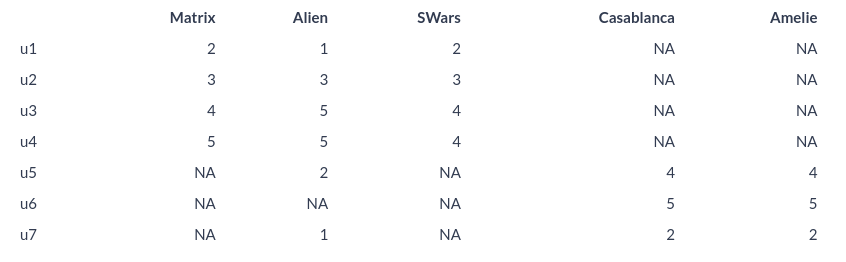

Podemos notar, las 3 primeras películas se podrían clasificar en el genero Ciencia Ficción mientras que las últimas 2 en Romance

In [11]:
import numpy as np

In [21]:
def jaccard_sim(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [26]:
def cosine_sim(list1, list2):
    numerador = np.dot(list1,list2)
    denominador = np.linalg.norm(list1)*np.linalg.norm(list2)
    return numerador / denominador

Calculemos la similitd entre un par de películas

In [29]:
matrix = [2,3,4,5,0,0,0]
alien = [1,3,5,5,2,0,1]
starwars = [2,3,4,4,0,0,0]
casablanca = [0,0,0,0,4,5,2]
amelie = [0,0,0,0,4,5,2]

In [30]:
cosine_similarity(alien, starwars)

0.9429903335828895

In [31]:
cosine_similarity(alien, casablanca)

0.18490006540840973

Calculemos la similitd entre un par de usuarios

In [33]:
user1 = [2,1,2,0,0]
user2 = [3,3,3,0,0]
user3 = [4,5,4,0,0]
user4 = [5,5,5,0,0]
user5 = [0,2,0,4,4]
user6 = [0,0,0,5,5]
user7 = [0,1,0,2,2]

Esperaríamos que el usuario 4 no sea muy similar al usuario 1, mientras que sí sea similar al usuario 3.

In [34]:
cosine_similarity(user4, user1)

0.9622504486493763

In [35]:
cosine_similarity(user4, user3)

0.9941348467724341

Para esta medida de similitud, vemos que hay un inconveniente al calcular la similitud directamente sobre los ratings.

Es más adecuado utilizar la distancia coseno de las calificaciones centradas por usuario para eliminar parte de la heterogeneidad en el uso de la escala. Observación. Al centrar las evaluaciones, el cero puede interprretarse como el promedio por usuario y si se imputaran los datos faltantes por cero, se le estaría asignando el promedio. En este caso imputar por cero sobre los datos centados es mejor que imputar cero sobre a escala original, que representaría que la película le gustó menos que 1.

**Ejercicio** Calculen la similitud coseno del usuario 4 vs usuario 1 y usuario 4 vs usuario 1, pero ahora con las calificaciones centradas.

Importancia de la escala en el cálculo de la similitud.

Considerar 3 sujetos con las siguientes características

- sujeto1: edad: 30 años, estatura: 1.65 mts
- sujeto2: edad: 30 años, estatura: 2.00 mts
- sujeto3: edad: 27 años, estatura: 1.60 mts

Si te encuentras a esas 3 personas en la calle, ¿quiénes dirías que son más similares?, ahora calcula la distancia euclidiana entre ellos considerando las 2 características dadas. ¿Quiénes resultaron tener menor distancia?


### Filtrado Colaborativo

Se utiliza similitud de películas/usuarios para hacer predicciones de gustos similares.

### Ventajas y Desventajas de los enfoques de recomendación

**Basado en Contenido**

+ +No necesita datos de otros usuarios.
+ +Capaz de hacer recomendaciones a usuarios con gustos muy particulares.
+ +Capaz de recomendar items que son nuevos, puede recomendar items que no son populares.
+ +Se puede explicar.

- -Puede ser díficil encontrar características apropiadas (se pueden incluir sesgos no intencionados).
- -Sobreespecialización. Nunca recomendará algo nuevo/distinto. Un usuario puede tener distintos tipos de gustos y puede ser que sólo estemos campturando un tipo de gusto.
- -Cold start. ¿Qué le recomiendas a un usuario nuevo que no ha calificado ningún item?





**Filtrado Colaborativo**

+ +Funciona para cualquier tipo de item. No es necesario realizar feature selection.

- -Necesita suficientes usuarios para funcionar.
- -Sparsity.
- -Cold start. No puede recomendar items que no han sido calificados.
- -Sesgo de popularidad.




Para solventar las desventajas de cada enfoque se han propuesto métodos híbridos


**Ejercicio**. Utilizar los datos MovieLens y calcular similitud entre usuarios y películas.